# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.043998e+01     7.102117e+00
 * time: 0.0018181800842285156
     1     2.680739e+01     4.536735e+00
 * time: 0.007403135299682617
     2     1.934227e+01     5.347455e+00
 * time: 0.015690088272094727
     3     1.266046e+01     3.473056e+00
 * time: 0.02144002914428711
     4     1.014266e+01     1.228658e+00
 * time: 0.026043176651000977
     5     9.308950e+00     1.433267e+00
 * time: 0.029517173767089844
     6     8.804445e+00     9.736221e-01
 * time: 0.03359413146972656
     7     8.507339e+00     6.133140e-01
 * time: 0.03763103485107422
     8     8.330378e+00     7.152002e-01
 * time: 0.04151606559753418
     9     8.159428e+00     5.456679e-01
 * time: 0.045248985290527344
    10     8.058820e+00     5.316425e-01
 * time: 0.04976511001586914
    11     7.985490e+00     4.142721e-01
 * time: 0.05476498603820801
    12     7.953399e+00     6.225431e-01
 * time: 0.05926203727722168
    13     7.923178e+00     4.535022e-01
 

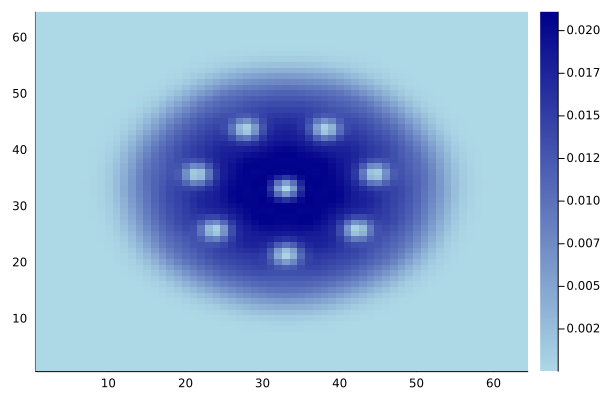

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)